In [126]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

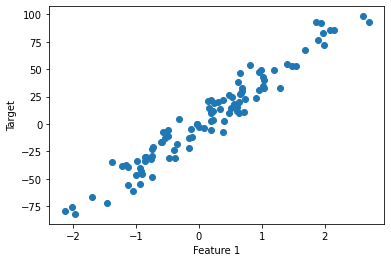

In [163]:
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=101)
# plot regression dataset
plt.scatter(X,y)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.show()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [165]:
training_accuracy = []
test_accuracy = []
neighbors = range(1,22)

In [166]:
for n in neighbors:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

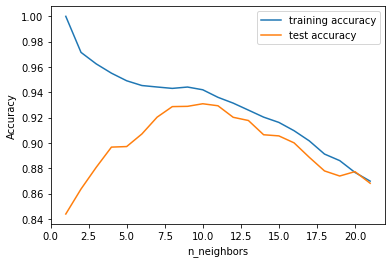

In [167]:
plt.plot(neighbors, training_accuracy, label='training accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();

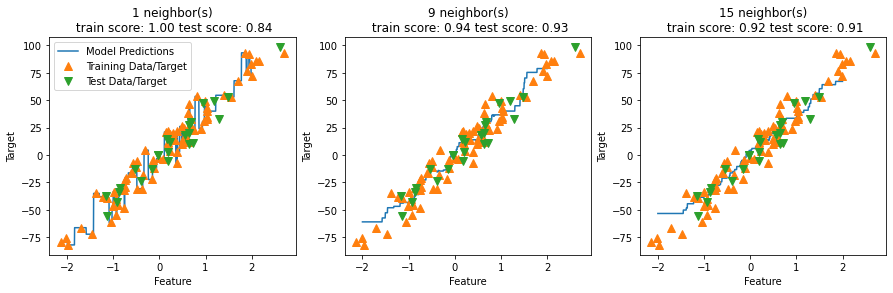

In [169]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-2,2,1000).reshape(-1,1)
for n, ax in zip([1,9,15], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
            n, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model Predictions', 'Training Data/Target', 'Test Data/Target'], loc='best');